1.均值、高斯、中值滤波器。

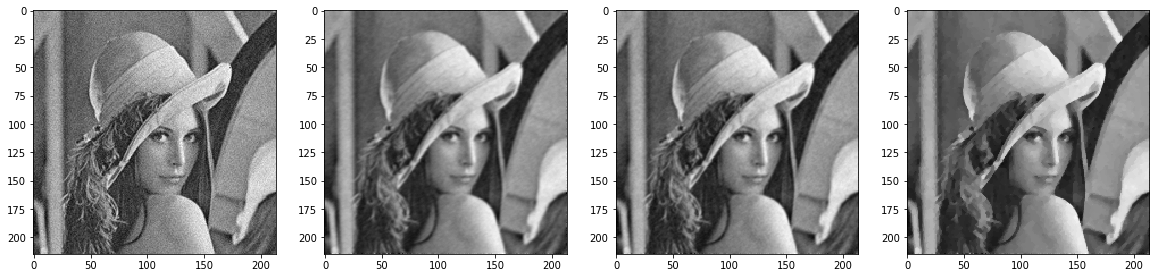

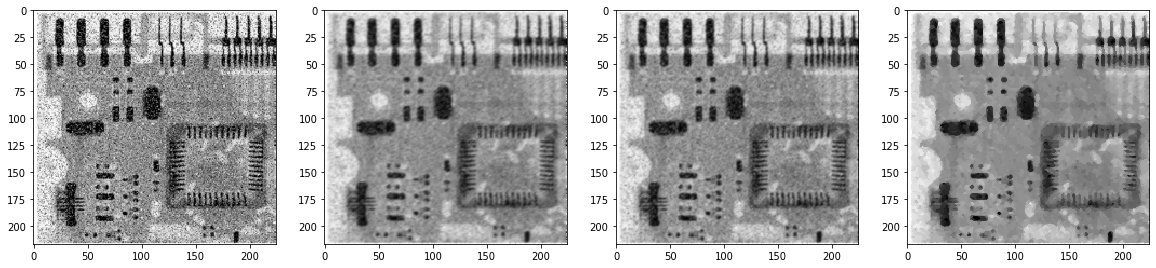

In [7]:
import numpy as np
import utils
import matplotlib.pyplot as plt

#均值滤波器核
MEAN_CORE = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
],dtype=np.uint8)

#中值滤波器核
GAUSS_CORE = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
],dtype=np.uint8)

#单通道滤波器，只支持cLxcL大小的正方形核
def oneChannFilter(img,core = MEAN_CORE,cL=3):
    h,w = img.shape
    c = np.sum(core)
    cl = cL

    #chi,cwi中心点坐标
    def __buildCore__(chi,cwi):
        l = int(cl/2)
        return img[chi-l:chi+l+1,cwi-l:cwi+l+1]

    for hi in range(1,h-1):
        for wi in range(1,w-1):
            img[hi,wi] = np.sum(__buildCore__(hi,wi) * core) / c

    return img

#中值滤波
def midValueOneChannFilter(img,coreL = 3):
    cl = coreL
    def __getMidValue__(chi,cwi):
        l = int(cl/2)
        core = img[chi-l:chi+l+1,cwi-l:cwi+l+1].reshape((1,cl*cl))[0]
        core = list(core)
        core.sort()
        return core[int(cl*cl*0.5)]

    h,w = img.shape
    
    for hi in range(1,h-1):
        for wi in range(1,w-1):
            img[hi,wi] = __getMidValue__(hi,wi)
    
    return img
funcs = [lambda img:img,oneChannFilter,lambda img:oneChannFilter(img,GAUSS_CORE),midValueOneChannFilter]

sample = utils.readGray("../imgs/c2/filter.jpg")
#此步依然是修正图片的灰度值,由于没有原图,所以读进来的时候只好手动修正
sample = 0.2 * sample
#此行代码与本页最下方注释区域作用一致，为方便理解就不删掉了
utils.compare(sample,funcs)


sample = utils.readGray("../imgs/c2/midFilter.jpg") * 0.2
utils.compare(sample,funcs)

# plt.subplot(1,4,1)
# plt.imshow(sample,cmap="gray")

# plt.subplot(1,4,2)
# plt.imshow(oneChannFilter(sample.copy()),cmap="gray")

# plt.subplot(1,4,3)
# plt.imshow(oneChannFilter(sample.copy(),GAUSS_CORE),cmap="gray")

# plt.subplot(1,4,4)
# plt.imshow(midValueOneChannFilter(sample.copy()),cmap="gray")


# plt.figure(2,figsize=(20,20))
# #电路板
# sample = utils.readGray("../imgs/c2/midFilter.jpg")
# #此步依然是修正图片的灰度值,由于没有原图,所以读进来的时候只好手动修正
# sample = 0.2 * sample

# plt.subplot(1,4,1)
# plt.imshow(sample,cmap="gray")

# plt.subplot(1,4,2)
# plt.imshow(oneChannFilter(sample.copy()),cmap="gray")

# plt.subplot(1,4,3)
# plt.imshow(oneChannFilter(sample.copy(),GAUSS_CORE),cmap="gray")

# plt.subplot(1,4,4)
# plt.imshow(midValueOneChannFilter(sample.copy()),cmap="gray")